In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
# Define transform
transform = transforms.ToTensor()

# Load all data (training + testing combined if needed)
full_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Extract image tensors and labels
all_images = full_dataset.data.numpy()      # shape: (60000, 28, 28)
all_labels = full_dataset.targets.numpy()   # shape: (60000,)

In [ ]:
# Flatten images and normalize (as numpy)
all_images = all_images / 255.0  
all_images = all_images.reshape(-1, 28*28) 

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)


In [13]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Wrap in TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [ ]:
class FashionANN(nn.Module):
    def __init__(self):
        super(FashionANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
# Initialize the model
model = FashionANN()

In [16]:
criterion = nn.CrossEntropyLoss()   # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
loss_list = []
accuracy_list = []

for epoch in range(10):
    total_loss = 0
    correct = 0
    total = 0
    model.train()

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    loss_list.append(total_loss)
    accuracy_list.append(acc)
    print(f"| Epoch: {epoch+1:2d} | Loss: {total_loss:.4f} | Accuracy: {acc*100:.2f}% |")


| Epoch:  1 | Loss: 187.2835 | Accuracy: 90.65% |
| Epoch:  2 | Loss: 181.7157 | Accuracy: 90.98% |
| Epoch:  3 | Loss: 173.9628 | Accuracy: 91.40% |
| Epoch:  4 | Loss: 170.2639 | Accuracy: 91.53% |
| Epoch:  5 | Loss: 165.5547 | Accuracy: 91.74% |
| Epoch:  6 | Loss: 160.6440 | Accuracy: 92.11% |
| Epoch:  7 | Loss: 154.0732 | Accuracy: 92.37% |
| Epoch:  8 | Loss: 153.2213 | Accuracy: 92.34% |
| Epoch:  9 | Loss: 147.9230 | Accuracy: 92.63% |
| Epoch: 10 | Loss: 142.7729 | Accuracy: 92.90% |


In [23]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy
test_acc = accuracy_score(all_labels, all_preds)
print("\n Model Evaluation on Test Set")
print(f" Test Accuracy: {test_acc:.2f}")

# Classification report
print("\n Classification Report (Per Class Metrics):")
print(classification_report(all_labels, all_preds))


 Model Evaluation on Test Set
 Test Accuracy: 0.89

 Classification Report (Per Class Metrics):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1200
           1       0.98      0.98      0.98      1200
           2       0.76      0.86      0.81      1200
           3       0.87      0.91      0.89      1200
           4       0.83      0.78      0.81      1200
           5       0.97      0.97      0.97      1200
           6       0.81      0.65      0.72      1200
           7       0.95      0.96      0.95      1200
           8       0.98      0.97      0.97      1200
           9       0.96      0.96      0.96      1200

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



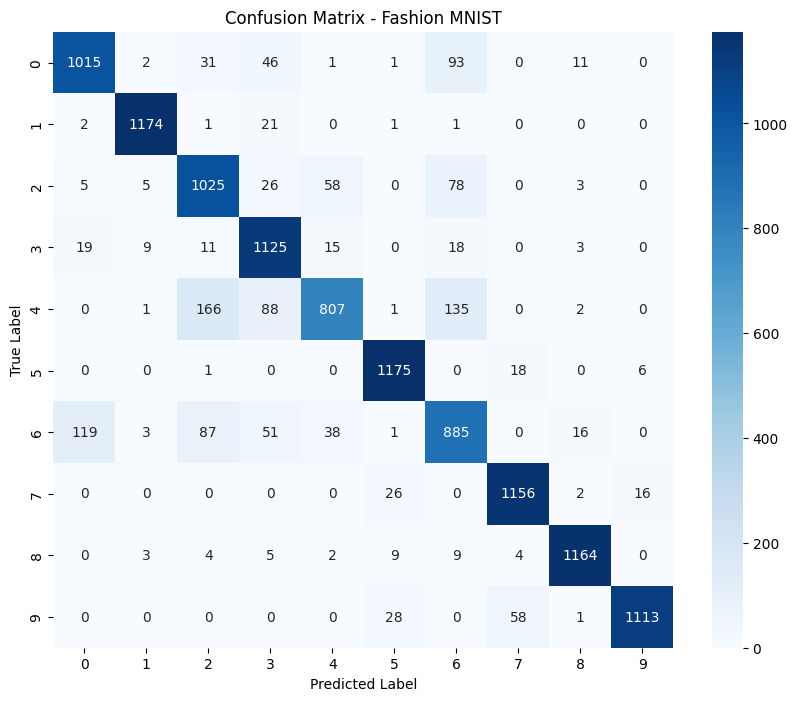

In [19]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fashion MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

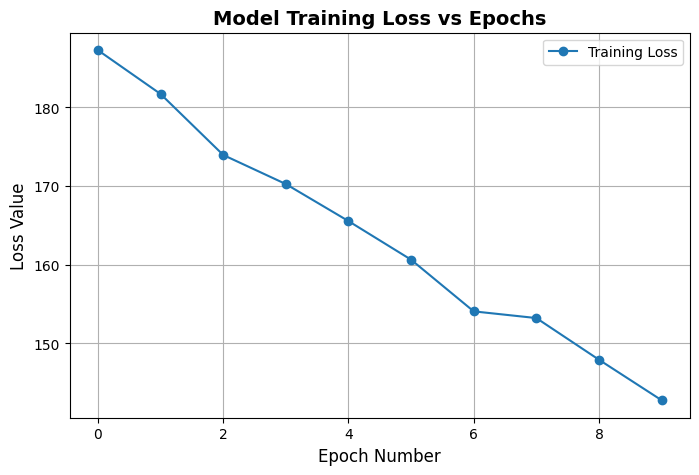

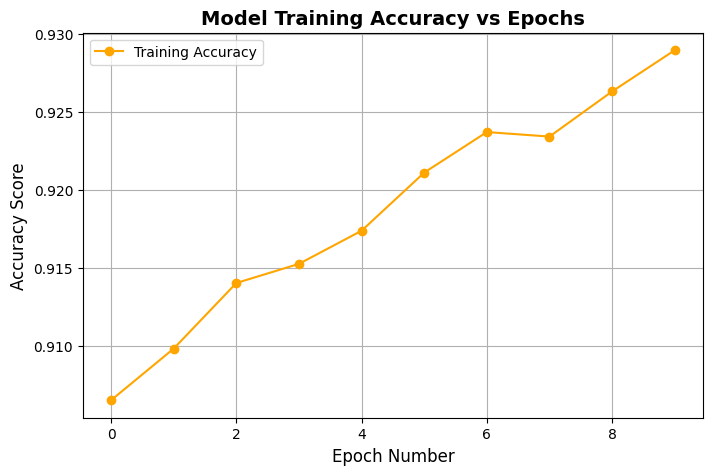

In [24]:
# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(loss_list, label='Training Loss', marker='o')
plt.title("Model Training Loss vs Epochs", fontsize=14, fontweight='bold')
plt.xlabel("Epoch Number", fontsize=12)
plt.ylabel("Loss Value", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(accuracy_list, label='Training Accuracy', color='orange', marker='o')
plt.title("Model Training Accuracy vs Epochs", fontsize=14, fontweight='bold')
plt.xlabel("Epoch Number", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()